🌲 Decision Tree Classifier Results
----------------------------------------
🔢 Accuracy: 75.00%
----------------------------------------
📊 Confusion Matrix:
                  Predicted: 0   Predicted: 1
Actual: 0              8              1
Actual: 1              2              1
----------------------------------------
📋 Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.50      0.33      0.40         3

    accuracy                           0.75        12
   macro avg       0.65      0.61      0.62        12
weighted avg       0.72      0.75      0.73        12

🔁 CV Accuracy Scores: [0.75  0.667 0.833 0.583 0.727]
✅ Mean CV Accuracy: 0.71




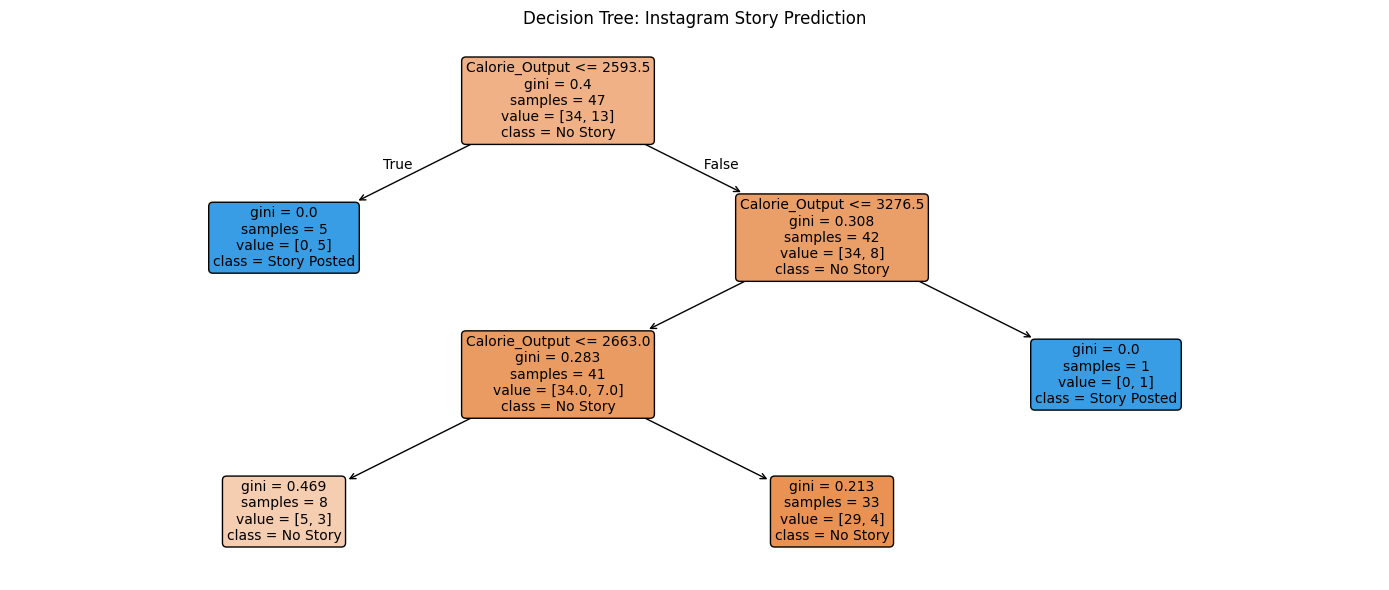

🌳 Random Forest Classifier Results
----------------------------------------
🔢 Accuracy: 66.67%
----------------------------------------
📊 Confusion Matrix:
                  Predicted: 0   Predicted: 1
Actual: 0              8              1
Actual: 1              3              0
----------------------------------------
📋 Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.00      0.00      0.00         3

    accuracy                           0.67        12
   macro avg       0.36      0.44      0.40        12
weighted avg       0.55      0.67      0.60        12

🔁 CV Accuracy Scores: [0.833 0.583 0.75  0.583 0.727]
✅ Mean CV Accuracy: 0.70


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load and clean the data
df = pd.read_excel("Data.xlsx")  # Ensure the file is in your directory
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df.dropna(subset=["Date"])
df["Story_Posted_Binary"] = (df["Story_Posted"] > 0).astype(int)

# Feature Enrichment and Transformation
df["DayOfWeek"] = df["Date"].dt.dayofweek  # 0 = Monday, 6 = Sunday
df["IsWeekend"] = df["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)

# Features and Target
X = df[["Calorie_Output", "DayOfWeek", "IsWeekend"]]
y = df["Story_Posted_Binary"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === DECISION TREE ===
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_conf_matrix = confusion_matrix(y_test, tree_pred)
tree_report = classification_report(y_test, tree_pred, zero_division=0)
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring="accuracy")

print("🌲 Decision Tree Classifier Results")
print("----------------------------------------")
print(f"🔢 Accuracy: {tree_accuracy * 100:.2f}%")
print("----------------------------------------")
print("📊 Confusion Matrix:")
print(f"{'':>17} Predicted: 0   Predicted: 1")
print(f"Actual: 0 {tree_conf_matrix[0][0]:>14} {tree_conf_matrix[0][1]:>14}")
print(f"Actual: 1 {tree_conf_matrix[1][0]:>14} {tree_conf_matrix[1][1]:>14}")
print("----------------------------------------")
print("📋 Classification Report:\n")
print(tree_report)
print("🔁 CV Accuracy Scores:", np.round(tree_cv_scores, 3))
print(f"✅ Mean CV Accuracy: {tree_cv_scores.mean():.2f}")
print("\n")

# Decision Tree Visualization
plt.figure(figsize=(14, 6))
plot_tree(tree_model, feature_names=X.columns, class_names=["No Story", "Story Posted"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Instagram Story Prediction")
plt.tight_layout()
plt.show()

# === RANDOM FOREST ===
forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

forest_pred = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_conf_matrix = confusion_matrix(y_test, forest_pred)
forest_report = classification_report(y_test, forest_pred, zero_division=0)
forest_cv_scores = cross_val_score(forest_model, X, y, cv=5, scoring="accuracy")

print("🌳 Random Forest Classifier Results")
print("----------------------------------------")
print(f"🔢 Accuracy: {forest_accuracy * 100:.2f}%")
print("----------------------------------------")
print("📊 Confusion Matrix:")
print(f"{'':>17} Predicted: 0   Predicted: 1")
print(f"Actual: 0 {forest_conf_matrix[0][0]:>14} {forest_conf_matrix[0][1]:>14}")
print(f"Actual: 1 {forest_conf_matrix[1][0]:>14} {forest_conf_matrix[1][1]:>14}")
print("----------------------------------------")
print("📋 Classification Report:\n")
print(forest_report)
print("🔁 CV Accuracy Scores:", np.round(forest_cv_scores, 3))
print(f"✅ Mean CV Accuracy: {forest_cv_scores.mean():.2f}")
